In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef


In [7]:
kepler = pd.read_csv('/content/Kepler Data for Webscraping.csv')
kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [8]:
kepler.isnull().sum()

,0
rowid,0
kepid,0
kepoi_name,0
kepler_name,7270
koi_disposition,0
koi_pdisposition,0
koi_score,1510
koi_fpflag_nt,0
koi_fpflag_ss,0
koi_fpflag_co,0


In [9]:
kepler = kepler.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name',
                     'koi_pdisposition', 'koi_score', 'koi_tce_delivname',
                     'koi_teq_err1', 'koi_teq_err2'], axis=1)
for column in kepler.columns[kepler.isna().sum() > 0]:
    kepler[column] = kepler[column].fillna(kepler[column].mean())

kepler_data = kepler[kepler.koi_disposition != 'CANDIDATE']


def numeric(value):
    if value == 'CONFIRMED':
        return 1
    else:
        return 0

kepler_data["koi_disposition"] = kepler_data.koi_disposition.map(numeric)

<ipython-input-9-08cbcdb5f323>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kepler_data["koi_disposition"] = kepler_data.koi_disposition.map(numeric)


In [13]:
kepler.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


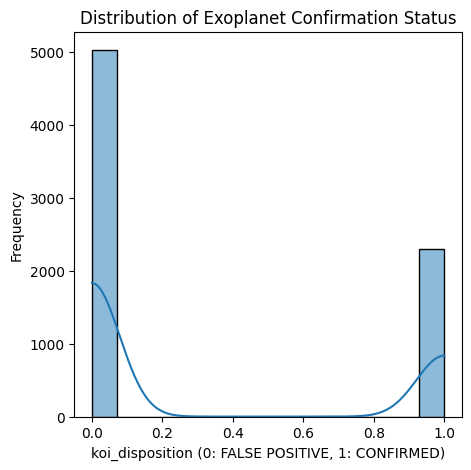

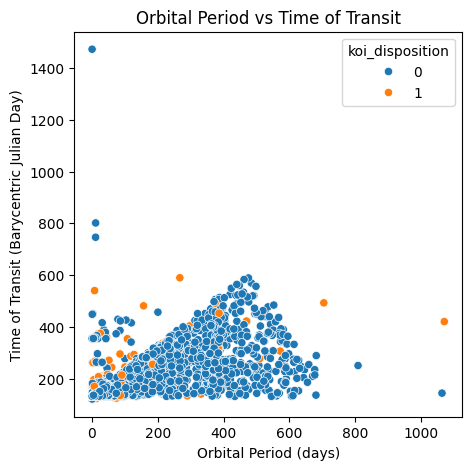

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of koi_disposition
plt.figure(figsize=(5, 5))
sns.histplot(kepler_data['koi_disposition'], kde=True)
plt.title('Distribution of Exoplanet Confirmation Status')
plt.xlabel('koi_disposition (0: FALSE POSITIVE, 1: CONFIRMED)')
plt.ylabel('Frequency')
plt.show()


# Scatter plot of koi_period vs koi_time0bk
plt.figure(figsize=(5, 5))
sns.scatterplot(x='koi_period', y='koi_time0bk', data=kepler_data, hue='koi_disposition')
plt.title('Orbital Period vs Time of Transit')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Time of Transit (Barycentric Julian Day)')
plt.show()



In [10]:
kepler_data.koi_disposition.value_counts()

,count
koi_disposition,
0,5023
1,2293


In [11]:
X = kepler_data.drop('koi_disposition', axis=1)
y = kepler_data['koi_disposition']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                train_size=0.8, test_size=0.2, random_state=0)

In [19]:
models = {
    " Logistic Regression": LogisticRegression(),
    "        Decision Tree": DecisionTreeClassifier(),
    "Suport Vector Machine": SVC(),
    "        Random Forest": RandomForestClassifier(),
    "  K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "       XGBoost": XGBClassifier()
}

In [23]:
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(name)
    print("Accuracy: {}.".format(accuracy_score(y_test,y_pred)))
    print("Precision: {}.".format(precision_score(y_test,y_pred)))
    print("Recall: {}".format(recall_score(y_test,y_pred)))
    print("F1_Score: {}".format(f1_score(y_test,y_pred)))
    print("AUC_ROC_Score: {}".format(roc_auc_score(y_test,y_pred)))
    print("MCC: {}".format(matthews_corrcoef(y_test,y_pred)))
    print()

 Logistic Regression
Accuracy: 0.9849726775956285.
Precision: 0.9736263736263736.
Recall: 0.977924944812362
F1_Score: 0.9757709251101322
AUC_ROC_Score: 0.9830277543052908
MCC: 0.9648848304096903

        Decision Tree
Accuracy: 0.9836065573770492.
Precision: 0.9714285714285714.
Recall: 0.9757174392935982
F1_Score: 0.973568281938326
AUC_ROC_Score: 0.9814294417041681
MCC: 0.9616920789180208

Suport Vector Machine
Accuracy: 0.9849726775956285.
Precision: 0.9715536105032823.
Recall: 0.9801324503311258
F1_Score: 0.9758241758241758
AUC_ROC_Score: 0.9836369472229319
MCC: 0.9649422231912217

        Random Forest
Accuracy: 0.9883879781420765.
Precision: 0.990990990990991.
Recall: 0.9713024282560706
F1_Score: 0.9810479375696767
AUC_ROC_Score: 0.983672974761072
MCC: 0.9727806547128559

  K-Nearest Neighbors
Accuracy: 0.98224043715847.
Precision: 0.9611231101511879.
Recall: 0.9823399558498896
F1_Score: 0.9716157205240175
AUC_ROC_Score: 0.9822679007736095
MCC: 0.9588164952693966

Gradient Boosting

With Parameter tuning


In [25]:
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

# Create dictionary with models and their parameter grids
models = {
    "Logistic Regression": (LogisticRegression(), param_grid_lr),
    "Decision Tree": (DecisionTreeClassifier(), param_grid_dt),
    "Support Vector Machine": (SVC(), param_grid_svm),
    "Random Forest": (RandomForestClassifier(), param_grid_rf),
    "K-Nearest Neighbors": (KNeighborsClassifier(), param_grid_knn),
    "Gradient Boosting": (GradientBoostingClassifier(), param_grid_gb),
    "XGBoost": (XGBClassifier(), param_grid_xgb)
}

In [28]:
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(name)
    print("Best parameters:", grid_search.best_params_)
    print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {:.3f}".format(precision_score(y_test, y_pred)))
    print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
    print("F1_Score: {:.3f}".format(f1_score(y_test, y_pred)))
    print("AUC_ROC_Score: {:.3f}".format(roc_auc_score(y_test, y_pred)))
    print("MCC: {:.3f}".format(matthews_corrcoef(y_test, y_pred)))
    print()

Logistic Regression
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.988
Precision: 0.982
Recall: 0.980
F1_Score: 0.981
AUC_ROC_Score: 0.986
MCC: 0.973

Decision Tree
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy: 0.986
Precision: 0.984
Recall: 0.971
F1_Score: 0.978
AUC_ROC_Score: 0.982
MCC: 0.968

Support Vector Machine
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.992
Precision: 0.987
Recall: 0.989
F1_Score: 0.988
AUC_ROC_Score: 0.992
MCC: 0.982

Random Forest
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.988
Precision: 0.993
Recall: 0.969
F1_Score: 0.981
AUC_ROC_Score: 0.983
MCC: 0.973

K-Nearest Neighbors
Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.982
Precision: 0.961
Recall: 0.982
F1_Score: 0.972
AUC_ROC_Score: 0.982
MCC: 0.959

Gradient Boosting
Best parameters: {'learning_rate':